In [2]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [3]:
!python -m spacy download en_core_web_sm

2022-12-02 10:25:48.209797: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
2022-12-02 10:25:57.041716: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library nvcuda.dll
2022-12-02 10:25:57.064730: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 computeCapability: 7.5
coreClock: 1.515GHz coreCount: 14 deviceMemorySize: 4.00GiB deviceMemoryBandwidth: 178.84GiB/s
2022-12-02 10:25:57.064765: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cudart64_110.dll
2022-12-02 10:25:57.077034: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cublas64_11.dll
2022-12-02 10:25:57.077088: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library cublasLt64

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
NER = spacy.load("en_core_web_sm")

In [5]:
import os
 
# Get all book files in the data directory
all_books = [b for b in os.scandir('books_data') if '.txt' in b.name]

In [6]:
all_books

[<DirEntry '1 The Last Wish.txt'>,
 <DirEntry '2 The Sword of Destiny.txt'>,
 <DirEntry '3 Blood of Elves.txt'>,
 <DirEntry '4 Times of Contempt.txt'>,
 <DirEntry '5 Baptism of Fire.txt'>,
 <DirEntry '6 The Tower of the Swallow.txt'>,
 <DirEntry '7 The Lady of the Lake.txt'>,
 <DirEntry '8 something ends something begins.txt'>]

In [7]:
book = all_books[1]
book_text = open(book).read()
book_doc = NER(book_text)

In [8]:
displacy.render(book_doc[0:2000], style="ent", jupyter=True)

In [9]:
# Read characters
character_df = pd.read_csv("characters.csv")

In [10]:
# Remove brackets and text within brackets
import re 
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x)) 
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])

In [11]:
pd.set_option('display.max_rows', None)
character_df

Unnamed: 0                                               book  \
0              0                Category:Baptism of Fire characters   
1              1                Category:Baptism of Fire characters   
2              2                Category:Baptism of Fire characters   
3              3                Category:Baptism of Fire characters   
4              4                Category:Baptism of Fire characters   
5              5                Category:Baptism of Fire characters   
6              6                Category:Baptism of Fire characters   
7              7                Category:Baptism of Fire characters   
8              8                Category:Baptism of Fire characters   
9              9                Category:Baptism of Fire characters   
10            10                Category:Baptism of Fire characters   
11            11                Category:Baptism of Fire characters   
12            12                Category:Baptism of Fire characters   
13            13                Category:Baptism of Fire characters   
14            14                Category:Baptism of Fire characters   
15            15                Category:Baptism of Fire characters   
16            16                Category:Baptism of Fire characters   
17            17                Category:Baptism of Fire characters   
18            18                Category:Baptism of Fire characters   
19            19                Category:Baptism of Fire characters   
20            20                Category:Baptism of Fire characters   
21            21                Category:Baptism of Fire characters   
22            22                Category:Baptism of Fire characters   
23            23                Category:Baptism of Fire characters   
24            24                Category:Baptism of Fire characters   
25            25                Category:Baptism of Fire characters   
26            26                Category:Baptism of Fire characters   
27            27                Category:Baptism of Fire characters   
28            28                Category:Baptism of Fire characters   
29            29                Category:Baptism of Fire characters   
30            30                Category:Baptism of Fire characters   
31            31                Category:Baptism of Fire characters   
32            32                Category:Baptism of Fire characters   
33            33                Category:Baptism of Fire characters   
34            34                Category:Baptism of Fire characters   
35            35                Category:Baptism of Fire characters   
36            36                Category:Baptism of Fire characters   
37            37                Category:Baptism of Fire characters   
38            38                Category:Baptism of Fire characters   
39            39                Category:Baptism of Fire characters   
40            40                Category:Baptism of Fire characters   
41            41                Category:Baptism of Fire characters   
42            42                Category:Baptism of Fire characters   
43            43                Category:Baptism of Fire characters   
44            44                Category:Baptism of Fire characters   
45            45                Category:Baptism of Fire characters   
46            46                Category:Baptism of Fire characters   
47            47                Category:Baptism of Fire characters   
48            48                Category:Baptism of Fire characters   
49            49                Category:Baptism of Fire characters   
50            50                Category:Baptism of Fire characters   
51            51                Category:Baptism of Fire characters   
52            52                Category:Baptism of Fire characters   
53            53                Category:Baptism of Fire characters   
54            54                Category:Baptism of Fire characters   
55            55              

In [12]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [13]:
sent_entity_df

sentence  \
0      (ï»¿The, Limits, of, the, Possible, \n, I, \n,...   
1      (", It, 's, been, an, hour, and, a, quarter, s...   
2                                 (He, 's, done, for, .)   
3      (", \n, The, townsfolk, ,, huddled, together, ...   
4      (A, fat, man, dressed, in, a, yellow, smock, \...   
5      (", We, have, to, wait, a, bit, longer, ,, ", ...   
6      (", Why, wait, ?, ", snorted, pimply, ,, ", Th...   
7      (Anyone, goes, down, there, ,, that, 's, the, ...   
8      (Have, you, forgotten, how, many, \n, have, di...   
9      (What, are, we, waiting, for, ?, ", \n, ", Thi...   
10     (", An, agreement, you, made, with, a, living,...   
11     (", He, is, now, dead, ,, as, surely, as, the,...   
12     (It, was, plain, from, the, beginning, that, h...   
13     (He, did, n't, even, take, a, mirror, with, hi...   
14     (", \n, ", At, least, we, 've, saved, some, co...   
15                   (You, might, as, well, go, home, .)   
16     (As, far, as, the, sorcerer, 's, horse, and, b...   
17     (", \n, ", Yes, ,, ", said, the, butcher, ,, "...   
18                           (Let, 's, take, a, look, .)   
19     (", \n, ", What, are, you, doing, ?, ", \n, ",...   
20     (Do, n't, get, in, the, way, unless, you, want...   
21     (", A, fine, old, mare, ,, ", repeated, the, b...   
22      (", Leave, the, horse, alone, ,, my, darling, .)   
23     (", \n, The, butcher, slowly, turned, around, ...   
24     (The, stranger, had, thick, curly, brown, hair...   
25                         (He, had, no, weapons, ., \n)   
26     (3, \n, ", Step, away, from, the, horse, ,, ",...   
27                          (", What, have, we, here, ?)   
28     (A, horse, and, saddlebags, belonging, to, ano...   
29     (Is, that, honourable, ?, ", \n, Pimply, slowl...   
30     (The, butcher, gave, a, nod, and, signalled, t...   
31     (Both, carried, heavy, clubs, ,, like, those, ...   
32     (", Who, are, you, ?, ", demanded, the, pimply...   
33     (", That, 's, none, of, your, business, ,, my,...   
34                (", \n, ", You, carry, no, weapons, .)   
35     (", \n, ", That, 's, true, ,, ", the, stranger...   
36     (", \n, ", That, 's, no, good, ,, ", pimply, d...   
37     (", \n, The, butcher, also, drew, a, blade, ;,...   
38     (The, other, two, men, approached, ,, brandish...   
39     (", I, do, n't, carry, weapons, ,, ", responde...   
40     (", \n, From, behind, the, ruins, ,, two, youn...   
41     (The, crowd, quickly, parted, ,, retreated, th...   
42     (The, girls, smiled, ,, flashing, their, teeth...   
43     (They, had, blue, stripes, tattooed, from, the...   
44     (Lynx, pelt, clad, their, strong, muscles, fro...   
45     (From, behind, the, mail, -, clad, shoulder, o...   
46     (Pimply, got, down, on, one, knee, and, slowly...   
47     (From, the, hole, in, ruins, came, a, rumble, ...   
48     (Following, the, hands, ,, a, white, head, app...   
49               (A, murmur, escaped, the, crowd, ., \n)   
50     (The, alabaster, -, haired, man, straightened,...   
51     (Holding, the, beast, by, its, long, lizard, -...   
52     (The, burgrave, jumped, backwards, and, trippe...   
53     (Its, slashed, throat, ,, once, carmine, ,, wa...   
54              (Its, sunken, eyes, were, glassy, ., \n)   
55     (", Here, 's, the, basilisk, ,, ", said, the, ...   
56     (I, will, check, them, ,, I, 'm, warning, you, .)   
57     (", \n, 4, \n, With, shaking, hands, ,, the, b...   
58     (The, white, -, haired, man, looked, around, a...   
59     (He, also, noticed, the, man, in, the, brown, ...   
60     (", It, 's, always, the, same, ,, ", he, said,...   
61     (You, people, never, change, ,, damn, you, to,...   
62     (", We, have, n't, touched, your, bags, ,, ", ...   
63     (The, men, armed, with, the, clubs, had, long,...   
64     (", Your, things, have, not, been, disturbed, ...   
65     (At, the, sight, of, his, smile, ,, which, blo...   
66     (", And, that, is, wh

In [14]:
# Function to filter out non-character entities
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list 
            if ent in list(character_df.character) 
            or ent in list(character_df.character_firstname)]

In [15]:
filter_entity(["Geralt", "Thu", "2"], character_df)

['Geralt']

In [16]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# Filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

sentence  \
96   (Is, there, anything, keeping, you, in, this, ...   
104  (", \n, ", Borch, ,, ", replied, Geralt, ,, wh...   
112  (", \n, Geralt, took, off, a, glove, and, shoo...   
140  (", I, forgot, ,, ", Three, Jackdaws, winked, ...   
157  (", Do, the, girls, speak, the, common, langua...   
160  (How, 's, your, soup, ,, Geralt, ?, ", \n, ", ...   
172  (Yet, there, is, a, certain, principal, underl...   
201    (", Bad, example, ,, ", interrupted, Geralt, .)   
229  (", I, know, ,, ", replied, Geralt, ,, nodding...   
240  (", So, ,, Geralt, ,, ", he, continued, ,, ", ...   

                     entities character_entities  
96          [Geralt of Rivia]  [Geralt of Rivia]  
104           [Borch, Geralt]           [Geralt]  
112                  [Geralt]           [Geralt]  
140  [Three Jackdaws, Geralt]           [Geralt]  
157                  [Geralt]           [Geralt]  
160                  [Geralt]           [Geralt]  
172                  [Geralt]           [Geralt]  
201                  [Geralt]           [Geralt]  
229                  [Geralt]           [Geralt]  
240                  [Geralt]           [Geralt]

In [17]:
# Take only first name of characters
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

<ipython-input-17-8660bad94cad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [18]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

sentence  \
96     (Is, there, anything, keeping, you, in, this, ...   
104    (", \n, ", Borch, ,, ", replied, Geralt, ,, wh...   
112    (", \n, Geralt, took, off, a, glove, and, shoo...   
140    (", I, forgot, ,, ", Three, Jackdaws, winked, ...   
157    (", Do, the, girls, speak, the, common, langua...   
...                                                  ...   
11289  (He, only, saw, black, -, gloved, hands, squee...   
11291                                 (Oh, ,, Geralt, !)   
11296                            (Say, it, ,, Geralt, !)   
11304  (I, 'm, your, destiny, ?, ", \n, Yurga, saw, a...   
11307  (With, good, reason, :, \n, ", You, 're, more,...   

                       entities character_entities  
96            [Geralt of Rivia]           [Geralt]  
104             [Borch, Geralt]           [Geralt]  
112                    [Geralt]           [Geralt]  
140    [Three Jackdaws, Geralt]           [Geralt]  
157                    [Geralt]           [Geralt]  
...                         ...                ...  
11289                    [Ciri]             [Ciri]  
11291                  [Geralt]           [Geralt]  
11296                  [Geralt]           [Geralt]  
11304                   [Yurga]            [Yurga]  
11307                    [Ciri]             [Ciri]  

[1423 rows x 3 columns]

In [19]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [20]:
relationship_df = pd.DataFrame(relationships)

In [21]:
pd.set_option('display.max_rows', None)
relationship_df

source             target
0                Geralt           Niedamir
1                Geralt           Niedamir
2                Geralt           Niedamir
3              Niedamir             Geralt
4              Niedamir             Geralt
5              Niedamir             Geralt
6              Niedamir             Geralt
7                Geralt               Eyck
8                Geralt               Eyck
9                Geralt               Eyck
10                 Eyck             Geralt
11                 Eyck             Geralt
12                 Eyck             Geralt
13               Geralt               Eyck
14                 Eyck             Geralt
15               Geralt               Eyck
16                 Eyck             Geralt
17               Geralt               Eyck
18               Geralt               Eyck
19               Geralt         Dorregaray
20               Geralt         Dorregaray
21           Dorregaray           Yennefer
22             Yennefer         Dorregaray
23             Yennefer         Dorregaray
24             Yennefer         Dorregaray
25             Yennefer         Dorregaray
26             Yennefer         Dorregaray
27             Yennefer         Dorregaray
28           Dorregaray             Geralt
29               Geralt             Yarpen
30               Geralt             Yarpen
31               Geralt             Yarpen
32               Yarpen           Niedamir
33               Yarpen           Niedamir
34         Gyllenstiern           Niedamir
35         Gyllenstiern           Niedamir
36         Gyllenstiern           Niedamir
37             Niedamir             Boholt
38               Geralt             Kennet
39               Geralt             Kennet
40               Kennet             Boholt
41               Kennet             Boholt
42               Kennet             Boholt
43               Boholt             Geralt
44               Geralt             Boholt
45               Boholt             Geralt
46               Geralt             Boholt
47               Boholt             Geralt
48               Boholt             Geralt
49               Boholt             Geralt
50               Boholt             Geralt
51               Boholt             Geralt
52               Geralt             Yarpen
53               Geralt             Yarpen
54               Geralt             Yarpen
55               Yarpen         Dorregaray
56               Yarpen         Dorregaray
57           Dorregaray           Yennefer
58               Yarpen         Dorregaray
59           Dorregaray           Yennefer
60               Yarpen         Dorregaray
61           Dorregaray           Yennefer
62           Dorregaray           Yennefer
63             Yennefer             Boholt
64           Dorregaray           Yennefer
65             Yennefer             Boholt
66               Boholt           Niedamir
67             Niedamir       Gyllenstiern
68             Yennefer             Boholt
69               Boholt           Niedamir
70             Niedamir       Gyllenstiern
71         Gyllenstiern           Yennefer
72               Boholt           Niedamir
73             Niedamir       Gyllenstiern
74         Gyllenstiern           Yennefer
75               Boholt           Niedamir
76             Niedamir       Gyllenstiern
77         Gyllenstiern           Yennefer
78               Boholt           Niedamir
79             Niedamir       Gyllenstiern
80         Gyllenstiern           Yennefer
81             Niedamir       Gyllenstiern
82         Gyllenstiern           Yennefer
83             Yennefer             Boholt
84             Yennefer             Boholt
85             Yennefer             Boholt
86             Yennefer             Boholt
87             Yennefer             Boholt
88             Yennefer             Boholt
89             Yennefer             Boholt
90               Boholt             Yarpen
91             Yennefer             Boholt
92               B

In [22]:
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

source             target
0                Geralt           Niedamir
1                Geralt           Niedamir
2                Geralt           Niedamir
3                Geralt           Niedamir
4                Geralt           Niedamir
5                Geralt           Niedamir
6                Geralt           Niedamir
7                  Eyck             Geralt
8                  Eyck             Geralt
9                  Eyck             Geralt
10                 Eyck             Geralt
11                 Eyck             Geralt
12                 Eyck             Geralt
13                 Eyck             Geralt
14                 Eyck             Geralt
15                 Eyck             Geralt
16                 Eyck             Geralt
17                 Eyck             Geralt
18                 Eyck             Geralt
19           Dorregaray             Geralt
20           Dorregaray             Geralt
21           Dorregaray           Yennefer
22           Dorregaray           Yennefer
23           Dorregaray           Yennefer
24           Dorregaray           Yennefer
25           Dorregaray           Yennefer
26           Dorregaray           Yennefer
27           Dorregaray           Yennefer
28           Dorregaray             Geralt
29               Geralt             Yarpen
30               Geralt             Yarpen
31               Geralt             Yarpen
32             Niedamir             Yarpen
33             Niedamir             Yarpen
34         Gyllenstiern           Niedamir
35         Gyllenstiern           Niedamir
36         Gyllenstiern           Niedamir
37               Boholt           Niedamir
38               Geralt             Kennet
39               Geralt             Kennet
40               Boholt             Kennet
41               Boholt             Kennet
42               Boholt             Kennet
43               Boholt             Geralt
44               Boholt             Geralt
45               Boholt             Geralt
46               Boholt             Geralt
47               Boholt             Geralt
48               Boholt             Geralt
49               Boholt             Geralt
50               Boholt             Geralt
51               Boholt             Geralt
52               Geralt             Yarpen
53               Geralt             Yarpen
54               Geralt             Yarpen
55           Dorregaray             Yarpen
56           Dorregaray             Yarpen
57           Dorregaray           Yennefer
58           Dorregaray             Yarpen
59           Dorregaray           Yennefer
60           Dorregaray             Yarpen
61           Dorregaray           Yennefer
62           Dorregaray           Yennefer
63               Boholt           Yennefer
64           Dorregaray           Yennefer
65               Boholt           Yennefer
66               Boholt           Niedamir
67         Gyllenstiern           Niedamir
68               Boholt           Yennefer
69               Boholt           Niedamir
70         Gyllenstiern           Niedamir
71         Gyllenstiern           Yennefer
72               Boholt           Niedamir
73         Gyllenstiern           Niedamir
74         Gyllenstiern           Yennefer
75               Boholt           Niedamir
76         Gyllenstiern           Niedamir
77         Gyllenstiern           Yennefer
78               Boholt           Niedamir
79         Gyllenstiern           Niedamir
80         Gyllenstiern           Yennefer
81         Gyllenstiern           Niedamir
82         Gyllenstiern           Yennefer
83               Boholt           Yennefer
84               Boholt           Yennefer
85               Boholt           Yennefer
86               Boholt           Yennefer
87               Boholt           Yennefer
88               Boholt           Yennefer
89               Boholt           Yennefer
90               Boholt             Yarpen
91               Boholt           Yennefer
92               B

In [23]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [24]:
relationship_df.head(10)

source    target  value
0        Geralt  Niedamir     32
1          Eyck    Geralt     49
2    Dorregaray    Geralt     19
3    Dorregaray  Yennefer     53
4        Geralt    Yarpen     16
5      Niedamir    Yarpen     25
6  Gyllenstiern  Niedamir     26
7        Boholt  Niedamir     31
8        Geralt    Kennet      2
9        Boholt    Kennet     11

In [25]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

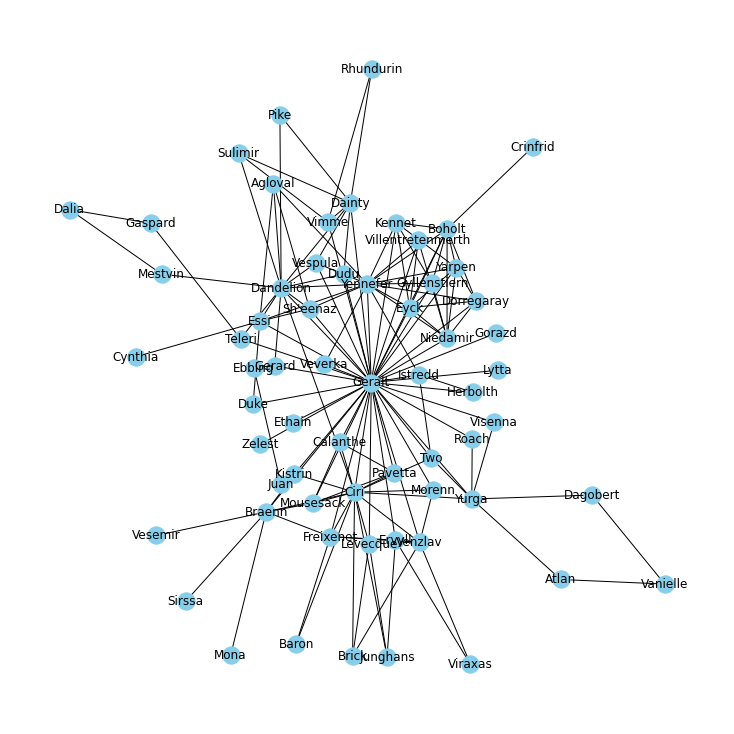

In [26]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [27]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")
# to see this please open "witcher.html" file I have submitted in zip folder

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [28]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Geralt': 0.6612903225806451,
 'Niedamir': 0.12903225806451613,
 'Eyck': 0.12903225806451613,
 'Dorregaray': 0.0967741935483871,
 'Yennefer': 0.25806451612903225,
 'Yarpen': 0.11290322580645161,
 'Gyllenstiern': 0.08064516129032258,
 'Boholt': 0.14516129032258063,
 'Kennet': 0.0967741935483871,
 'Crinfrid': 0.016129032258064516,
 'Villentretenmerth': 0.06451612903225806,
 'Istredd': 0.06451612903225806,
 'Herbolth': 0.03225806451612903,
 'Two': 0.06451612903225806,
 'Dandelion': 0.22580645161290322,
 'Vespula': 0.06451612903225806,
 'Dainty': 0.12903225806451613,
 'Pike': 0.03225806451612903,
 'Vimme': 0.06451612903225806,
 'Sulimir': 0.04838709677419355,
 'Rhundurin': 0.03225806451612903,
 'Dudu': 0.04838709677419355,
 "Sh'eenaz": 0.08064516129032258,
 'Teleri': 0.04838709677419355,
 'Gaspard': 0.03225806451612903,
 'Dalia': 0.03225806451612903,
 'Mestvin': 0.03225806451612903,
 'Essi': 0.11290322580645161,
 'Agloval': 0.06451612903225806,
 'Gerard': 0.03225806451612903,
 'Zelest': 0

<AxesSubplot:>

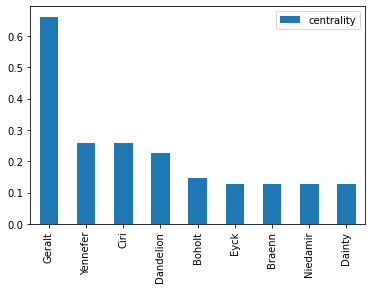

In [29]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

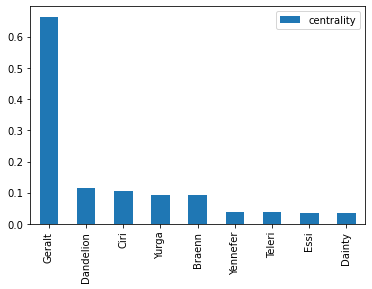

In [30]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

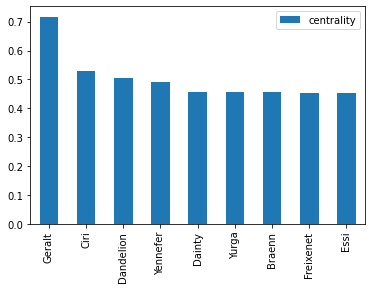

In [31]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [32]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

In [33]:
pip install python-louvain

Note: you may need to restart the kernel to use updated packages.


In [34]:
from community import community_louvain

In [35]:
communities = community_louvain.best_partition(G)

In [36]:
communities

{'Geralt': 0,
 'Niedamir': 1,
 'Eyck': 1,
 'Dorregaray': 1,
 'Yennefer': 1,
 'Yarpen': 1,
 'Gyllenstiern': 1,
 'Boholt': 1,
 'Kennet': 1,
 'Crinfrid': 1,
 'Villentretenmerth': 1,
 'Istredd': 0,
 'Herbolth': 0,
 'Two': 0,
 'Dandelion': 5,
 'Vespula': 5,
 'Dainty': 5,
 'Pike': 5,
 'Vimme': 5,
 'Sulimir': 5,
 'Rhundurin': 5,
 'Dudu': 5,
 "Sh'eenaz": 2,
 'Teleri': 5,
 'Gaspard': 5,
 'Dalia': 5,
 'Mestvin': 5,
 'Essi': 2,
 'Agloval': 2,
 'Gerard': 5,
 'Zelest': 0,
 'Duke': 2,
 'Veverka': 0,
 'Ethain': 0,
 'Ebbing': 3,
 'Juan': 3,
 'Cynthia': 2,
 'Ciri': 4,
 'Braenn': 4,
 'Kistrin': 4,
 'Vesemir': 4,
 'Sirssa': 4,
 'Freixenet': 4,
 'Ervyll': 4,
 'Venzlav': 4,
 'Viraxas': 4,
 'Morenn': 4,
 'Mona': 4,
 'Pavetta': 4,
 'Baron': 4,
 'Brick': 4,
 'Levecque': 4,
 'Junghans': 4,
 'Mousesack': 4,
 'Calanthe': 4,
 'Yurga': 0,
 'Roach': 0,
 'Visenna': 0,
 'Atlan': 0,
 'Vanielle': 0,
 'Dagobert': 0,
 'Lytta': 0,
 'Gorazd': 0}

In [37]:
nx.set_node_attributes(G, communities, 'group')

In [38]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("witcher_communities.html")
# to see this please open "witcher_communities.html" file I have submitted in zip folder

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [39]:
from lib.utils.functions import *

In [40]:
# Initialize empty list for graphs from books
books_graph = []
all_books = [b for b in os.scandir('books_data') if '.txt' in b.name]
# Load spacy English languague model
nlp = spacy.load("en_core_web_sm")

# Sort dir entries by name
all_books.sort(key=lambda x: x.name)

In [41]:
# Loop through book list and create graphs
for book in all_books:
    book_text = ner(book)
    
    # Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)
    
    # Select only character entities
    sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

    # Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
    
    # Take only first name of characters
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

    # Create relationship df
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)                                                                                                               
    
    # Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     
    
    books_graph.append(G)

<ipython-input-41-234de5f3f067>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
<ipython-input-41-234de5f3f067>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
<ipython-input-41-234de5f3f067>:15: SettingWithCopyWarning: 
A value is trying to be set on a 

<AxesSubplot:>

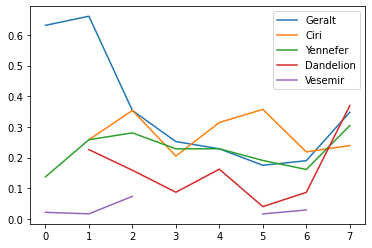

In [42]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of 5 main characters
degree_evol_df[["Geralt", "Ciri", "Yennefer", "Dandelion", "Vesemir"]].plot()